In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:

df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Data Prepocessing

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df['ph'] = df['ph'].fillna(df['ph'].median())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())


In [9]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## EDA

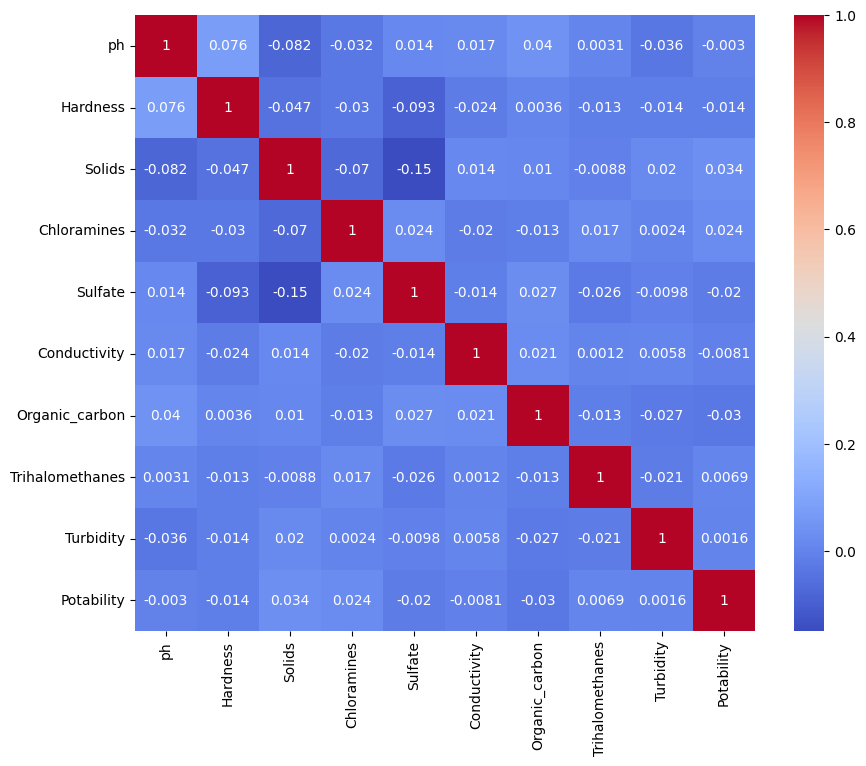

In [10]:


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()



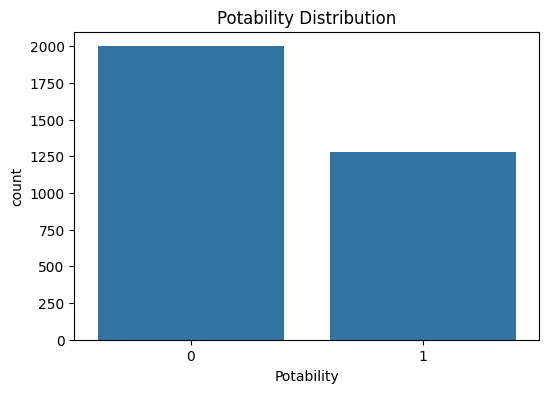

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Potability', data=df)
plt.title('Potability Distribution')
plt.show()

## Split Data

In [12]:
x = df.drop('Potability', axis=1)
y = df['Potability']

In [13]:
y.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [14]:
print(x.shape,y.shape)

(3276, 9) (3276,)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

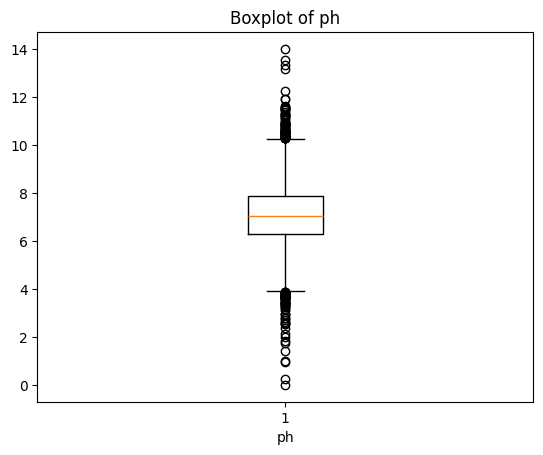

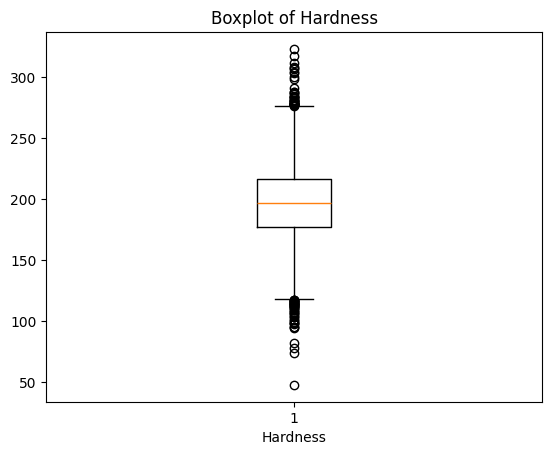

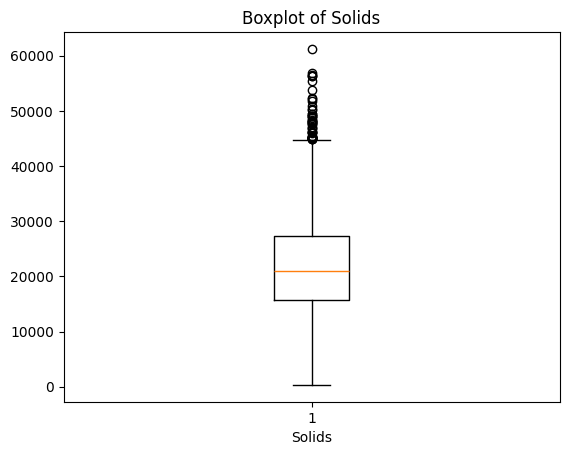

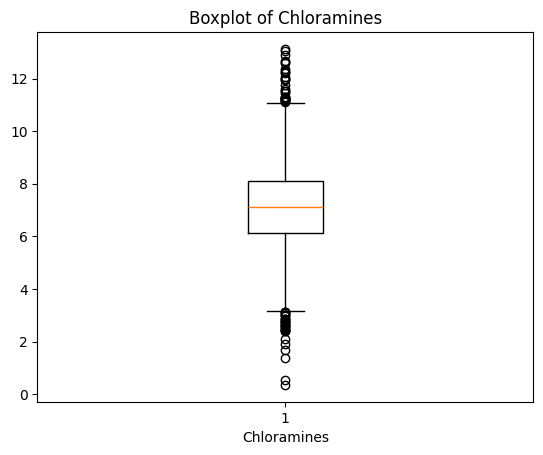

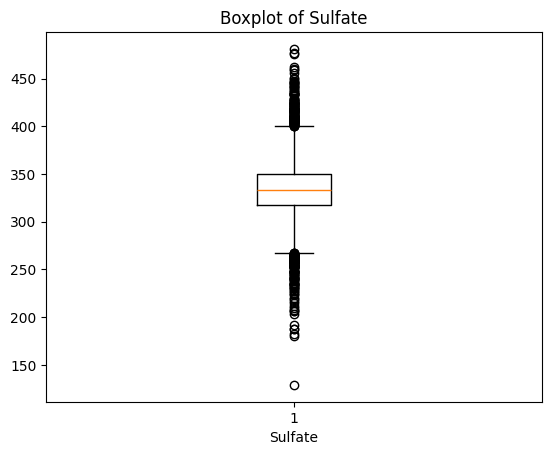

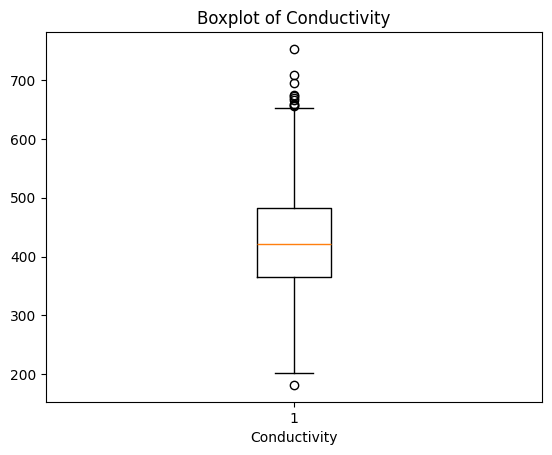

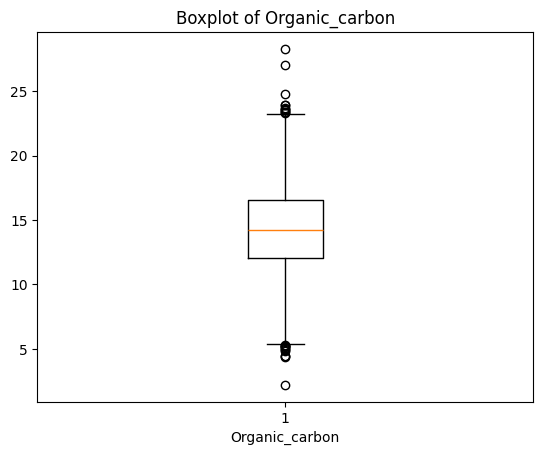

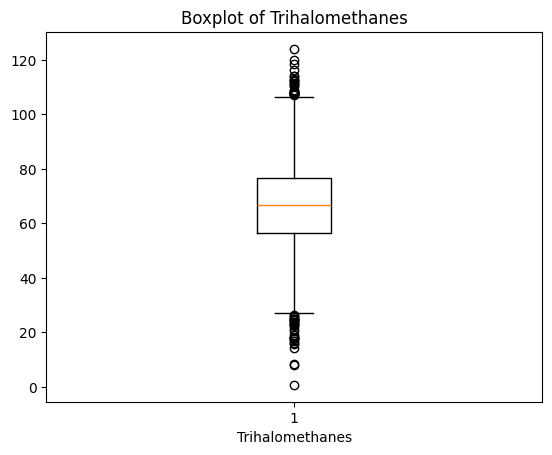

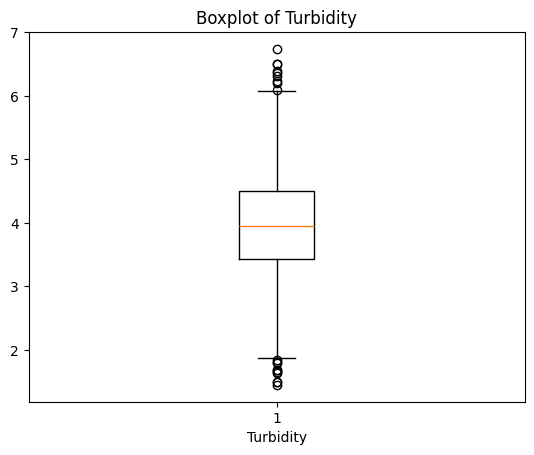

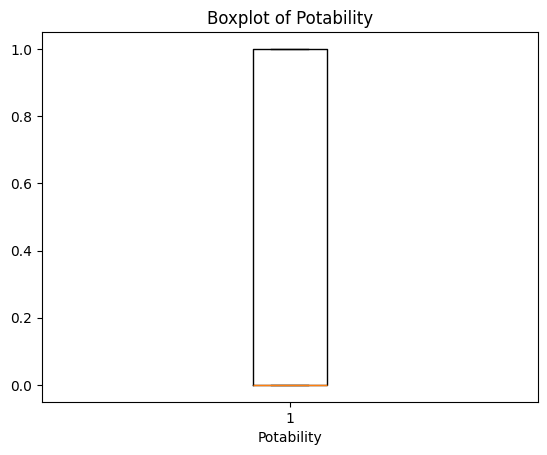

In [17]:
import matplotlib.pyplot as plt

for col in df:
    if df[col].dtype in ['int64', 'float64']:
        plt.boxplot(df[col])   
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        plt.show()

## Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)



In [19]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [20]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [21]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
x_train_scale_resambled, y_train_scale_resambled = smote_tomek.fit_resample(x_train_scaled, y_train)



In [22]:
y_train.value_counts()

Potability
0    1586
1    1034
Name: count, dtype: int64

In [23]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report

In [24]:
models = [KNeighborsClassifier(), DecisionTreeClassifier(),RandomForestClassifier(), GradientBoostingClassifier(), XGBClassifier()]

for model in models:
    print(model)

    model.fit(x_train_scale_resambled, y_train_scale_resambled)

    y_pred = model.predict(x_test_scaled)

    # sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    # plt.xlabel('Predicted')
    # plt.ylabel('Actual')
    # plt.show()

    print(classification_report(y_test, y_pred))
    print("\n\n")

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.71      0.63      0.66       412
           1       0.47      0.56      0.51       244

    accuracy                           0.60       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.62      0.60      0.61       656




DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.68      0.59      0.63       412
           1       0.43      0.52      0.47       244

    accuracy                           0.57       656
   macro avg       0.55      0.56      0.55       656
weighted avg       0.59      0.57      0.57       656




RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       412
           1       0.56      0.52      0.54       244

    accuracy                           0.67       656
   macro avg       0.64      0.64      0.64      

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
}

grid_rf = GridSearchCV(
    rf,
    param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_rf.fit(x_train_scale_resambled, y_train_scale_resambled)

best_rf = grid_rf.best_estimator_


In [26]:
from xgboost import XGBClassifier 

xgb = XGBClassifier( objective='binary:logistic', eval_metric='logloss', random_state=42 ) 
param_grid_xgb = { 'n_estimators': [100, 200], 
                  'max_depth': [3, 5], 
                  'learning_rate': [0.05, 0.1], 
                  'subsample': [0.8, 1.0], 
                  'colsample_bytree': [0.8, 1.0] } 
grid_xgb = GridSearchCV( xgb, param_grid_xgb, scoring='f1', cv=5, n_jobs=-1 ) 
grid_xgb.fit(x_train_scale_resambled, y_train_scale_resambled) 
best_xgb = grid_xgb.best_estimator_ 
print("Best XGB Params:", grid_xgb.best_params_)

Best XGB Params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_gb = GridSearchCV(
    gb,
    param_grid_gb,
    scoring='recall',
    cv=5
)

grid_gb.fit(x_train_scale_resambled, y_train_scale_resambled)

best_gb = grid_gb.best_estimator_


In [28]:
from sklearn.metrics import classification_report

for name, model in {
    "Random Forest": best_rf,
    "Gradient Boosting": best_gb,
    "XGBoost": best_xgb
}.items():
    y_pred = model.predict(x_test_scaled)
    print(name)
    print(classification_report(y_test, y_pred))


Random Forest
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       412
           1       0.55      0.50      0.53       244

    accuracy                           0.66       656
   macro avg       0.64      0.63      0.63       656
weighted avg       0.66      0.66      0.66       656

Gradient Boosting
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       412
           1       0.49      0.54      0.51       244

    accuracy                           0.62       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.63      0.62      0.62       656

XGBoost
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       412
           1       0.55      0.54      0.54       244

    accuracy                           0.66       656
   macro avg       0.64      0.64      0.64       656
weighted avg       0.66      0.66 

In [29]:
import pickle

data = {
    'model': best_xgb,
    'scaler': scaler
}

with open("water_potability_model.pkl", "wb") as obj:
    pickle.dump(data, obj)
